In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.preprocessing import scale
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [2]:
def load_features(file_names, drop_attr=[]):
    df_list = []
    for file in file_names:
        df = pd.read_csv(file, index_col=[0], header=[0], delimiter="\t", skiprows=[1])
        df = df.dropna(axis=1, how='any').transpose()
        df = df.iloc[:,6:]
        df = df.drop(drop_attr, axis=1)
        df_list.append(df)
    return(df_list)

def feature_hist(df, ncol=4, len_single_plot = 5):
    n = df.shape[1]
    if((n % ncol)==0):
        nrow = int(n / ncol)
    else:
        nrow = int(n / ncol + 1)
        
    print(nrow, ncol)
    fig, ax = plt.subplots(nrow, ncol, figsize=(len_single_plot*ncol, len_single_plot*nrow))
    ax = ax.reshape(-1,)
    for i in range(n):
        ax[i].hist(df.iloc[:,i], label = df.columns[i])
        ax[i].legend()
    return


def feature_hist_compare(df_list, df_names, ncol=4, len_single_plot = 5):
    n = df_list[0].shape[1]
    featuer_names = df_list[0].columns.tolist()
    assert all([df.shape[1]==n for df in df_list])
    assert len(df_list) == len(df_names)
    if((n % ncol)==0):
        nrow = int(n / ncol)
    else:
        nrow = int(n / ncol + 1)
        
    print(nrow, ncol)
    fig, ax = plt.subplots(nrow, ncol, figsize=(len_single_plot*ncol, len_single_plot*nrow))
    ax = ax.reshape(-1,)
    for i in range(n):
        ax[i].set_title(featuer_names[i])
        for j in range(len(df_list)):
            df = df_list[j]
            ax[i].hist(df.iloc[:,i], histtype='step', normed=True, label=df_names[j])
        ax[i].legend()
    return

# Features:	 20
# CPU:	 50
# LGN:	 11
5 4


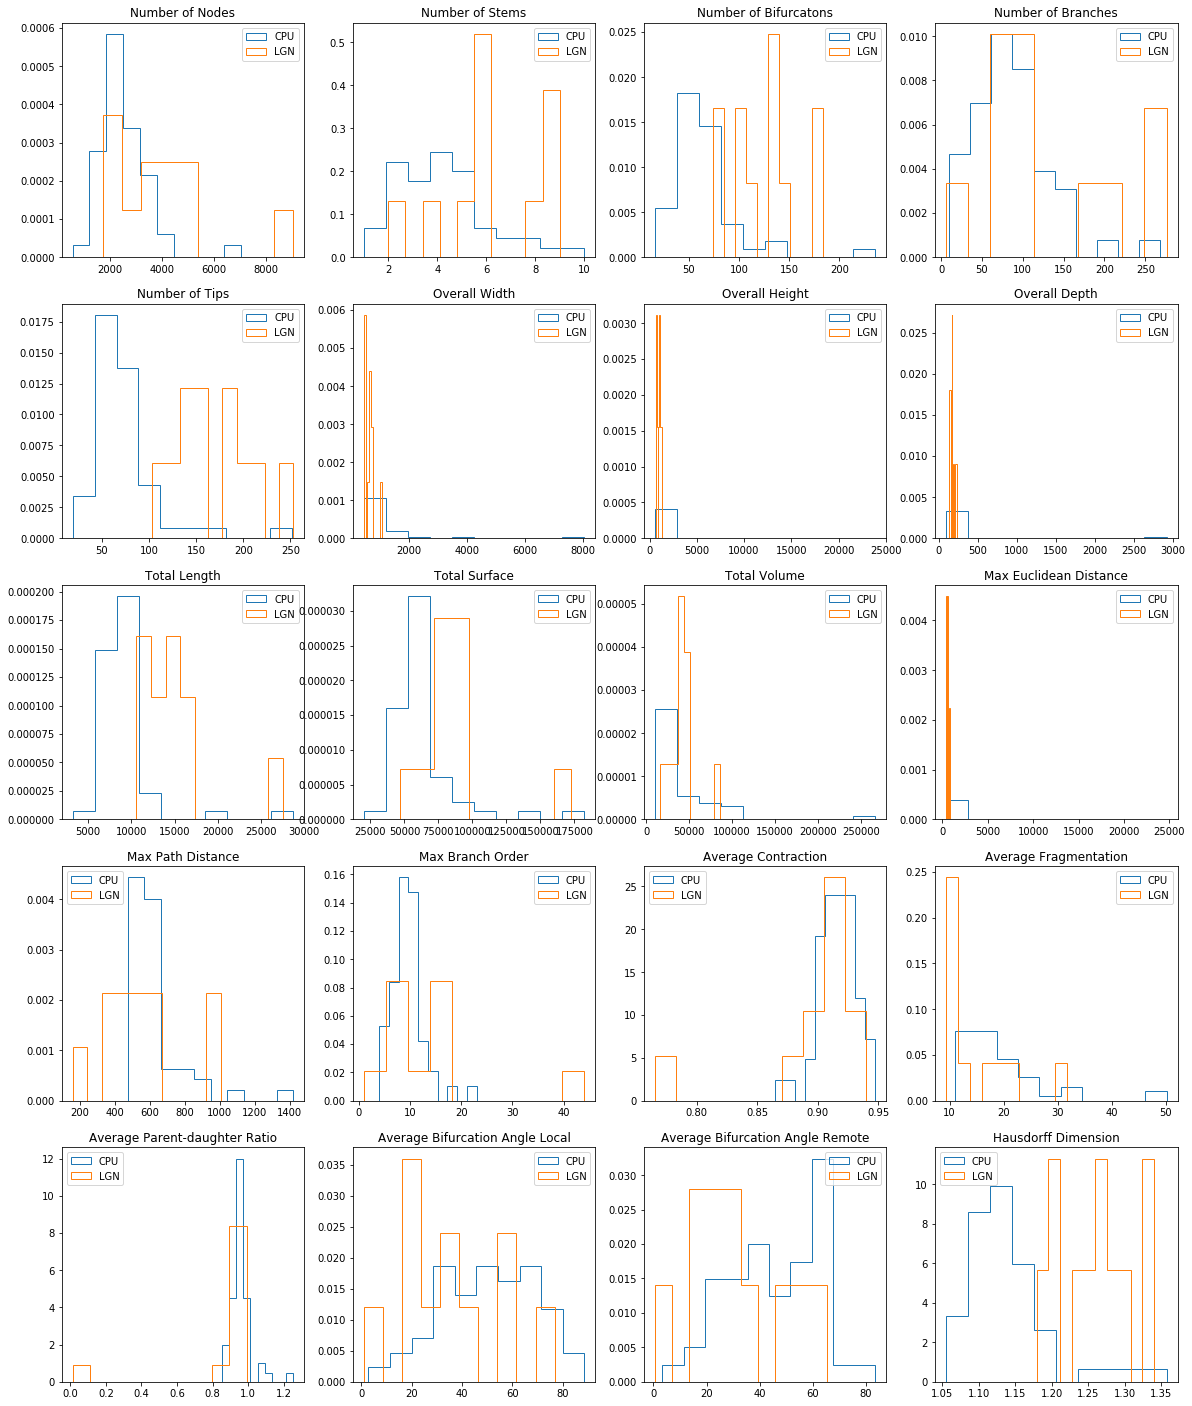

In [3]:
cpu, lgn = load_features(
    file_names = ['data/17302_CPU.dendrite.features', 'data/17302_LGN.dendrite.features'],
    drop_attr = ['Soma Surface', 'Average Diameter'])
print('# Features:\t', cpu.shape[1])
print("# CPU:\t", len(cpu))
print("# LGN:\t", len(lgn))
feature_hist_compare([cpu, lgn], ['CPU', 'LGN'])

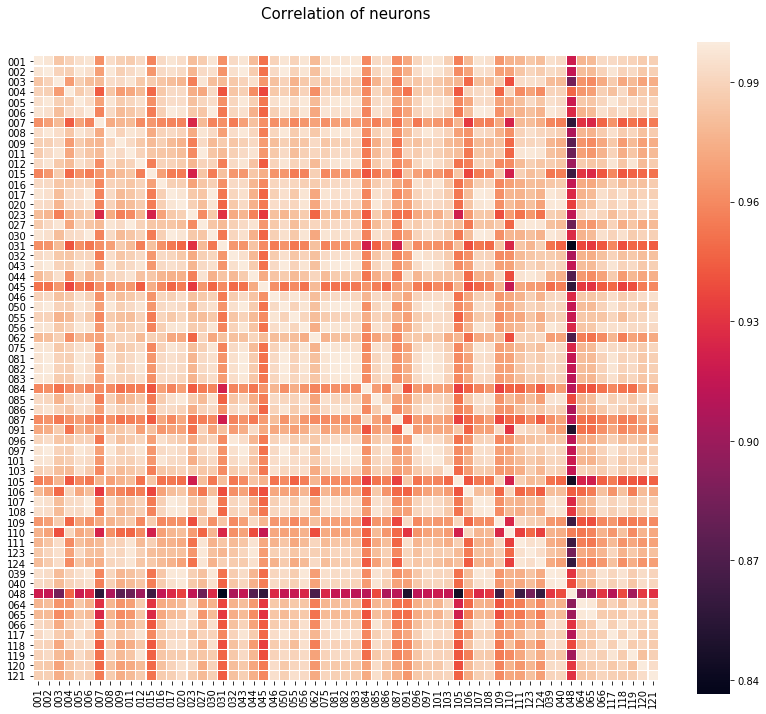

In [4]:
combined = pd.concat([cpu, lgn], axis=0)
# combined = combined[['Number of Branches', 'Number of Bifurcatons']]
plt.figure(figsize=(14,12))
plt.title('Correlation of neurons',y=1.05,size=15)
sns.heatmap(combined.transpose().corr(method='spearman'), linewidths=0.1, vmax=1.0,
            square=True, linecolor='white', annot=False)

In [5]:
cpu.sort_values('Number of Tips', ascending=False)
# cpu.sort_values('Overall Width', ascending=False)
# cpu.sort_values('Average Fragmentation', ascending=False)

ID,Number of Nodes,Number of Stems,Number of Bifurcatons,Number of Branches,Number of Tips,Overall Width,Overall Height,Overall Depth,Total Length,Total Surface,Total Volume,Max Euclidean Distance,Max Path Distance,Max Branch Order,Average Contraction,Average Fragmentation,Average Parent-daughter Ratio,Average Bifurcation Angle Local,Average Bifurcation Angle Remote,Hausdorff Dimension
023,7054.0,2.0,236.0,123.0,252.0,710.000,1384.000,164.0200,28727.10,182251.0,93343.9,745.811,1113.440,23.0,0.947489,13.3171,0.984065,28.04400,25.30730,1.35697
020,3954.0,5.0,142.0,133.0,162.0,721.330,1060.000,216.9300,19351.70,116208.0,58337.5,612.274,582.475,10.0,0.923224,10.9774,0.969571,33.11000,29.60370,1.32502
012,4017.0,4.0,132.0,268.0,138.0,1071.000,786.000,192.0000,10941.40,83068.3,66639.7,681.288,782.987,14.0,0.936154,13.9627,1.067630,56.44450,53.55520,1.14202
108,3321.0,3.0,115.0,68.0,126.0,1308.000,891.000,172.3300,13128.20,92189.9,59459.6,859.127,646.272,12.0,0.923895,14.5735,1.075280,22.70500,19.44360,1.14554
087,3326.0,5.0,97.0,194.0,105.0,8056.000,23905.000,1138.1300,9091.03,56485.5,28045.8,24682.600,537.641,12.0,0.916632,15.6134,0.972025,76.27720,66.51670,1.13911
017,3200.0,4.0,88.0,65.0,102.0,775.000,601.000,171.0000,8882.39,55256.0,27456.3,532.289,534.781,11.0,0.917846,17.3077,0.939692,33.25740,27.29160,1.07293
055,2648.0,2.0,86.0,158.0,93.0,894.000,1732.000,302.3200,8957.57,55810.1,27755.8,1318.810,759.650,19.0,0.925232,14.2468,0.985190,58.53770,58.98440,1.19465
097,3067.0,5.0,85.0,149.0,90.0,784.000,732.000,203.3000,10721.00,67295.5,33627.1,510.146,568.245,9.0,0.923862,16.6376,0.967114,49.24710,47.04760,1.09732
084,2299.0,4.0,74.0,101.0,89.0,2470.080,4801.590,2923.4400,10098.80,66656.4,61804.1,5582.370,662.708,9.0,0.910431,13.8020,0.953182,52.66860,44.94950,1.29279
110,2032.0,1.0,77.0,10.0,88.0,733.330,916.000,156.5100,8491.08,53351.0,26675.5,573.095,497.708,4.0,0.897753,22.9000,0.902000,2.75405,3.37952,1.12650
